In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path of the dataset
compiled_cases ='/content/drive/My Drive/Colab Notebooks/data/Omdena/compiled_cases_data.csv'

In [ ]:
# Import libraries
import pandas as pd

In [ ]:
# Import the data
# Prints the number of rows and columns of the dataset
compiled_cases_df = pd.read_csv(compiled_cases)

# csv data may have trailing and leading spaces, trimming whitespace from data elements
compiled_cases_df = compiled_cases_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Prints row and columns
num_row, num_col = compiled_cases_df.shape
print(f'There are {num_row} row(s) and {num_col} column(s)')

# Removing empty rows from csv if any
compiled_cases_df.dropna(axis=0, how='all',inplace=True)

# Prints first 5 rows of the DataFrame
compiled_cases_df.head(5)

There are 232 row(s) and 12 column(s)


,case,conclusion,conclusion_certainty,case_without_conclusion,evidence,score_1,name_1,score_2,name_2,score_3,name_3,final_score
0,On behalf of Ms. Amira I would like to ask for...,NaN,NaN,On behalf of Ms. Amira I would like to ask for...,NaN,0.10,Jianna,0.08,Kamal,0.10,Shrey Grover,0.09
1,The following information has been supplied by...,NaN,NaN,The following information has been supplied by...,NaN,0.95,Jianna,0.70,Kamal,0.90,Shrey Grover,0.85
2,I hope you all are well and sane in these chal...,NaN,NaN,I hope you all are well and sane in these chal...,NaN,0.80,Jianna,0.70,Shrey Grover,0.65,Kamal,0.72
3,"The child protection office in Beirut, Lebanon...",NaN,NaN,"The child protection office in Beirut, Lebanon...",NaN,0.60,Jianna,0.65,Shrey Grover,0.58,Kamal,0.61
4,I am writing from Children and Families Across...,NaN,NaN,I am writing from Children and Families Across...,NaN,0.05,Jianna,0.20,Shrey Grover,0.10,Kamal,0.12


In [ ]:
# Basic info about the dataset
compiled_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case                     232 non-null    object 
 1   conclusion               129 non-null    object 
 2   conclusion_certainty     2 non-null      object 
 3   case_without_conclusion  199 non-null    object 
 4   evidence                 100 non-null    object 
 5   score_1                  199 non-null    float64
 6   name_1                   199 non-null    object 
 7   score_2                  185 non-null    float64
 8   name_2                   185 non-null    object 
 9   score_3                  156 non-null    float64
 10  name_3                   156 non-null    object 
 11  final_score              156 non-null    float64
dtypes: float64(4), object(8)
memory usage: 23.6+ KB


In [ ]:
# Checking for null values
compiled_cases_df.isnull().sum()

case                         0
conclusion                 103
conclusion_certainty       230
case_without_conclusion     33
evidence                   132
score_1                     33
name_1                      33
score_2                     47
name_2                      47
score_3                     76
name_3                      76
final_score                 76
dtype: int64

In [ ]:
# Rename the column 'text'
compiled_cases_df = compiled_cases_df.rename(columns = {'case': 'Background information'})

In [ ]:
# Check to confirm the column rename
compiled_cases_df 

,Background information,conclusion,conclusion_certainty,case_without_conclusion,evidence,score_1,name_1,score_2,name_2,score_3,name_3,final_score
0,On behalf of Ms. Amira I would like to ask for...,NaN,NaN,On behalf of Ms. Amira I would like to ask for...,NaN,0.10,Jianna,0.08,Kamal,0.10,Shrey Grover,0.09
1,The following information has been supplied by...,NaN,NaN,The following information has been supplied by...,NaN,0.95,Jianna,0.70,Kamal,0.90,Shrey Grover,0.85
2,I hope you all are well and sane in these chal...,NaN,NaN,I hope you all are well and sane in these chal...,NaN,0.80,Jianna,0.70,Shrey Grover,0.65,Kamal,0.72
3,"The child protection office in Beirut, Lebanon...",NaN,NaN,"The child protection office in Beirut, Lebanon...",NaN,0.60,Jianna,0.65,Shrey Grover,0.58,Kamal,0.61
4,I am writing from Children and Families Across...,NaN,NaN,I am writing from Children and Families Across...,NaN,0.05,Jianna,0.20,Shrey Grover,0.10,Kamal,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
227,Hadiya was 8 years old when her father interve...,"ISS became involved in Nigeria and, after havi...",NaN,Hadiya was 8 years old when her father interve...,father intervened to save her from a secret so...,0.93,Jianna,0.90,kamal,0.92,Ananya,0.92
228,"Alexandru, 17 years old left Bulgaria for Unit...","and, through ISS, was able to be in contact wi...",NaN,"Alexandru, 17 years old left Bulgaria for Unit...","human traffickers, The traffickers took advant...",0.84,Jianna,0.85,kamal,0.80,Ananya,0.83
229,"Adriano, born in Nepal, was 4 years old when h...","In collaboration with local social services, I...",NaN,"Adriano, born in Nepal, was 4 years old when h...","adopted, a loving boy who was integrating well...",0.45,Jianna,0.35,kamal,0.30,Ananya,0.37
230,Aime was 15 years old when he decided to leave...,Aime and his carers requested ISS services to ...,NaN,Aime was 15 years old when he decided to leave...,He had already faced many difficulties in his ...,0.65,Jianna,0.50,kamal,0.52,Ananya,0.56


In [ ]:
# Focusing on Background information column
background_df = compiled_cases_df['Background information']
background_df

0      On behalf of Ms. Amira I would like to ask for...
1      The following information has been supplied by...
2      I hope you all are well and sane in these chal...
3      The child protection office in Beirut, Lebanon...
4      I am writing from Children and Families Across...
                             ...                        
227    Hadiya was 8 years old when her father interve...
228    Alexandru, 17 years old left Bulgaria for Unit...
229    Adriano, born in Nepal, was 4 years old when h...
230    Aime was 15 years old when he decided to leave...
231    Mamadou, Abdoulaye, Fatou and Ndiaye always li...
Name: Background information, Length: 232, dtype: object

In [ ]:
# Convert the Background information column data into dataframe
background_df = background_df.to_frame()
background_df

,Background information
0,On behalf of Ms. Amira I would like to ask for...
1,The following information has been supplied by...
2,I hope you all are well and sane in these chal...
3,"The child protection office in Beirut, Lebanon..."
4,I am writing from Children and Families Across...
...,...
227,Hadiya was 8 years old when her father interve...
228,"Alexandru, 17 years old left Bulgaria for Unit..."
229,"Adriano, born in Nepal, was 4 years old when h..."
230,Aime was 15 years old when he decided to leave...


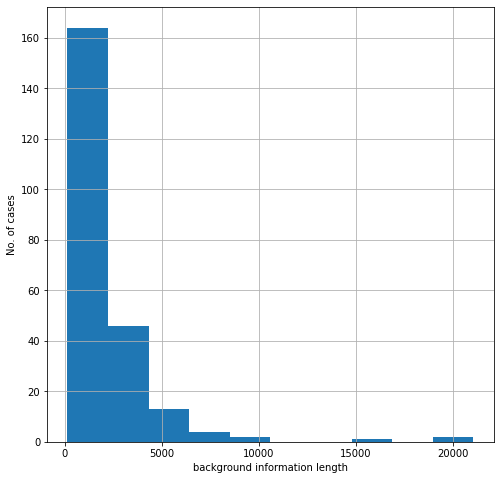

In [ ]:
# Visualizing background information length
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel("background information length")
plt.ylabel("No. of cases")

background_df['Background information'].str.len().hist()

# Pre-Processing

In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

In [ ]:
# Applying contraction mapping -Expand Contractions

background_df['no_contract'] = background_df['Background information'].apply(lambda x: [contractions.fix(word) for word in x.split()])
background_df

,Background information,no_contract
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t..."
1,The following information has been supplied by...,"[The, following, information, has, been, suppl..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ..."
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families..."
...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father..."
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f..."
229,"Adriano, born in Nepal, was 4 years old when h...","[Adriano,, born, in, Nepal,, was, 4, years, ol..."
230,Aime was 15 years old when he decided to leave...,"[Aime, was, 15, years, old, when, he, decided,..."


In [ ]:
# Joining the list of items back into one string

background_df['background_information_str'] = [' '.join(map(str, l)) for l in background_df['no_contract']]
background_df

,Background information,no_contract,background_information_str
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...
...,...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father...",Hadiya was 8 years old when her father interve...
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f...","Alexandru, 17 years old left Bulgaria for Unit..."
229,"Adriano, born in Nepal, was 4 years old when h...","[Adriano,, born, in, Nepal,, was, 4, years, ol...","Adriano, born in Nepal, was 4 years old when h..."
230,Aime was 15 years old when he decided to leave...,"[Aime, was, 15, years, old, when, he, decided,...",Aime was 15 years old when he decided to leave...


In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
background_df['lower_case'] = background_df['background_information_str'].str.lower()
background_df['no_punc'] = background_df['lower_case'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

background_df

,Background information,no_contract,background_information_str,lower_case,no_punc
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...
...,...,...,...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father...",Hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f...","Alexandru, 17 years old left Bulgaria for Unit...","alexandru, 17 years old left bulgaria for unit...",alexandru 17 years old left bulgaria for unite...
229,"Adriano, born in Nepal, was 4 years old when h...","[Adriano,, born, in, Nepal,, was, 4, years, ol...","Adriano, born in Nepal, was 4 years old when h...","adriano, born in nepal, was 4 years old when h...",adriano born in nepal was 4 years old when he ...
230,Aime was 15 years old when he decided to leave...,"[Aime, was, 15, years, old, when, he, decided,...",Aime was 15 years old when he decided to leave...,aime was 15 years old when he decided to leave...,aime was 15 years old when he decided to leave...



Regex explanation:

* [^] matches everything but everything inside the blockquotes
* \w matches any word character (equal to [a-zA-Z0-9_])
* \d matches a digit (equal to [0-9])
* \s matches any whitespace character (equal to [\r\n\t\f\v ])
* \' matches the character ' literally (case sensitive)
* '+' matches between one and unlimited times, as many times as possible, giving back as needed


In [ ]:
# Using nltk for tokenization, hoping to use spacy instead 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# nltk tokenization
background_df['tokenized'] = background_df['no_punc'].apply(word_tokenize)
background_df['tokenized']

0      [on, behalf, of, ms, amira, i, would, like, to...
1      [the, following, information, has, been, suppl...
2      [i, hope, you, all, are, well, and, sane, in, ...
3      [the, child, protection, office, in, beirut, l...
4      [i, am, writing, from, children, and, families...
                             ...                        
227    [hadiya, was, 8, years, old, when, her, father...
228    [alexandru, 17, years, old, left, bulgaria, fo...
229    [adriano, born, in, nepal, was, 4, years, old,...
230    [aime, was, 15, years, old, when, he, decided,...
231    [mamadou, abdoulaye, fatou, and, ndiaye, alway...
Name: tokenized, Length: 232, dtype: object

In [ ]:
# Initializing Stop words libraries to filter the English stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


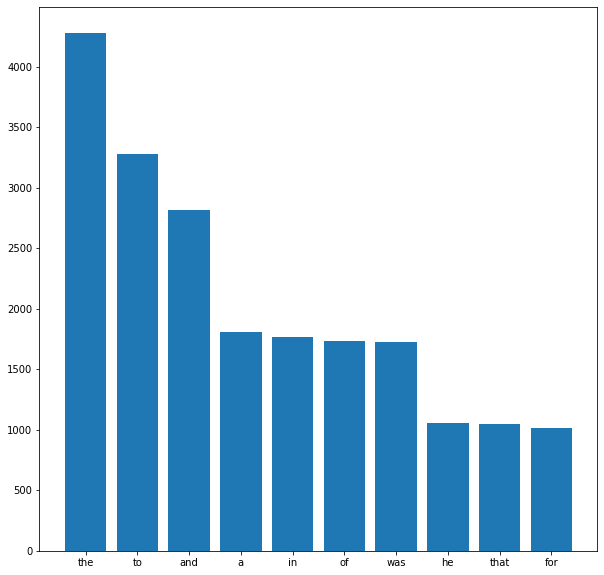

In [ ]:
# Plotting top stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(background_df['Background information'])

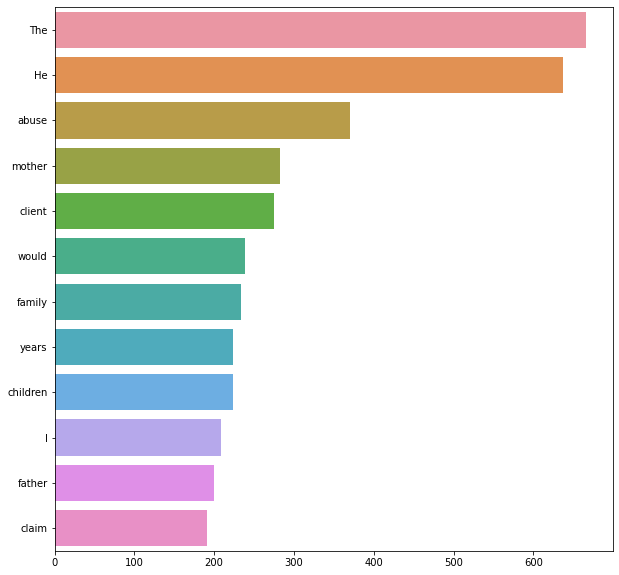

In [ ]:
# Plotting top non stopwords
import seaborn as sns
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(background_df['Background information'])

In [ ]:
# Remove stopwords 

background_df['stopwords_removed'] = background_df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
background_df


,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat..."
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,..."
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,..."
...,...,...,...,...,...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father...",Hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,"[hadiya, was, 8, years, old, when, her, father...","[hadiya, 8, years, old, father, intervened, sa..."
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f...","Alexandru, 17 years old left Bulgaria for Unit...","alexandru, 17 years old left bulgaria for unit...",alexandru 17 years old left bulgaria for unite...,"[alexandru, 17, years, old, left, bulgaria, fo...","[alexandru, 17, years, old, left, bulgaria, un..."
229,"Adriano, born in Nepal, was 4 years old when h...","[Adriano,, born, in, Nepal,, was, 4, years, ol...","Adriano, born in Nepal, was 4 years old when h...","adriano, born in nepal, was 4 years old when h...",adriano born in nepal was 4 years old when he ...,"[adriano, born, in, nepal, was, 4, years, old,...","[adriano, born, nepal, 4, years, old, adopted,..."
230,Aime was 15 years old when he decided to leave...,"[Aime, was, 15, years, old, when, he, decided,...",Aime was 15 years old when he decided to leave...,aime was 15 years old when he decided to leave...,aime was 15 years old when he decided to leave...,"[aime, was, 15, years, old, when, he, decided,...","[aime, 15, years, old, decided, leave, dr, con..."


In [ ]:
# Part of Speech Tagging
background_df['pos_tags'] = background_df['stopwords_removed'].apply(nltk.tag.pos_tag)
background_df.head()

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat...","[(behalf, NN), (ms, NN), (amira, NN), (would, ..."
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf...","[(following, VBG), (information, NN), (supplie..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng..."
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r...","[(child, NN), (protection, NN), (office, NN), ..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,...","[(writing, VBG), (children, NNS), (families, N..."


In [ ]:
# Initializing wordnet libraries
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Parts of Speech Tagging

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
        
background_df['wordnet_pos'] = background_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
background_df.head()

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat...","[(behalf, NN), (ms, NN), (amira, NN), (would, ...","[(behalf, n), (ms, n), (amira, n), (would, n),..."
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf...","[(following, VBG), (information, NN), (supplie...","[(following, v), (information, n), (supplied, ..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging..."
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r...","[(child, NN), (protection, NN), (office, NN), ...","[(child, n), (protection, n), (office, n), (be..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,...","[(writing, VBG), (children, NNS), (families, N...","[(writing, v), (children, n), (families, n), (..."


In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
background_df['lemmatized'] = background_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
background_df.head()

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat...","[(behalf, NN), (ms, NN), (amira, NN), (would, ...","[(behalf, n), (ms, n), (amira, n), (would, n),...","[behalf, m, amira, would, like, ask, cooperati..."
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf...","[(following, VBG), (information, NN), (supplie...","[(following, v), (information, n), (supplied, ...","[follow, information, supply, youth, welfare, ..."
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as..."
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r...","[(child, NN), (protection, NN), (office, NN), ...","[(child, n), (protection, n), (office, n), (be...","[child, protection, office, beirut, lebanon, r..."
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,...","[(writing, VBG), (children, NNS), (families, N...","[(writing, v), (children, n), (families, n), (...","[write, child, family, across, border, uk, req..."


In [ ]:
# Join strings together 

background_df['tokenized_Background information_join'] = [' '.join(map(str, l)) for l in background_df['lemmatized']]
background_df

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,tokenized_Background information_join
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat...","[(behalf, NN), (ms, NN), (amira, NN), (would, ...","[(behalf, n), (ms, n), (amira, n), (would, n),...","[behalf, m, amira, would, like, ask, cooperati...",behalf m amira would like ask cooperation trac...
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf...","[(following, VBG), (information, NN), (supplie...","[(following, v), (information, n), (supplied, ...","[follow, information, supply, youth, welfare, ...",follow information supply youth welfare office...
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as...",hope well sane challenge time kindly ask suppo...
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r...","[(child, NN), (protection, NN), (office, NN), ...","[(child, n), (protection, n), (office, n), (be...","[child, protection, office, beirut, lebanon, r...",child protection office beirut lebanon request...
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,...","[(writing, VBG), (children, NNS), (families, N...","[(writing, v), (children, n), (families, n), (...","[write, child, family, across, border, uk, req...",write child family across border uk request as...
...,...,...,...,...,...,...,...,...,...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father...",Hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,"[hadiya, was, 8, years, old, when, her, father...","[hadiya, 8, years, old, father, intervened, sa...","[(hadiya, RB), (8, CD), (years, NNS), (old, JJ...","[(hadiya, r), (8, n), (years, n), (old, a), (f...","[hadiya, 8, year, old, father, intervene, save...",hadiya 8 year old father intervene save secret...
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f...","Alexandru, 17 years old left Bulgaria for Unit...","alexandru, 17 years old left bulgaria for unit...",alexandru 17 years old left bulgaria for unite...,"[alexandru, 17, years, old, left, bulgaria, fo...","[alexandru, 17, years, old, left, bulgaria, un...","[(alexandru, 

In [ ]:
# TF-IDF - “Term Frequency — Inverse Data Frequency
# https://towardsdatascience.com/a-gentle-introduction-to-calculating-the-tf-idf-values-9e391f8a13e5
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# tfidf calculation - relevant words 
text_content = background_df['tokenized_Background information_join']
#vector = TfidfVectorizer()
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf_subset = vector.fit_transform(text_content)

In [ ]:
# Each column represents a unique word in the document in alphabetical order
import numpy as np
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 3), columns=vocab)
tfidf_df

,07,0917,0918,0920,0926,10,10000,101,1010,10107,1011,1012,1013,1014,1015,1019,102003,1021,102107,1026,1028,102807,105000,107,10707,10th,11,110,110500,111,1115,112,1121,113,114,115,115000,116,117,118,...,worthwhile,wound,wrap,wright,wrightour,wrinkle,write,wrong,xray,xrays,xx,yaqoub,yearold,yearsbbk,yearsin,yearsold,yearsthe,yearswith,yell,yes,yesterday,york,yorkshire,young,younger,youngest,youngster,yous,youssef,youth,ysgol,zach,zahra,zakaria,zalmai,zaranj,zeneida,ziad,zoloft,zowak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.018,0.0,0.0,0.0,0.0,0.024,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.039,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.061,0.000,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Print all the vocabularies used in the document
print(vocab)

['07', '0917', '0918', '0920', '0926', '10', '10000', '101', '1010', '10107', '1011', '1012', '1013', '1014', '1015', '1019', '102003', '1021', '102107', '1026', '1028', '102807', '105000', '107', '10707', '10th', '11', '110', '110500', '111', '1115', '112', '1121', '113', '114', '115', '115000', '116', '117', '118', '119', '11th', '12', '120', '121', '122', '122002', '123', '124', '12500', '125000', '12599', '13', '13000', '130000', '1315', '134360', '13hopkins', '13year', '13yearold', '14', '140', '14000', '149360', '15', '150', '15000', '1520', '15th', '15year', '15years', '15yr', '16', '160000', '164160', '16throughout', '16yearold', '16years', '17', '170', '170000', '17th', '17the', '17year', '17years', '18', '180000', '18b', '19', '1960s', '1961', '1964', '1966', '1968', '1970s', '1970sduggan', '1971', '1972', '1973', '1974', '1975', '19752002', '1976', '1977', '1978', '1979', '1979mr', '1980', '1980s', '1980smr', '1981', '1982', '1983', '19841985', '19841989', '1985', '1986', '1

Document Similarity

* Cosine Similarity
* Document Clustering

In [ ]:
tfidf_subset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_content = cosine_similarity(tfidf_subset, tfidf_subset)
cosine_content

array([[1.        , 0.05850515, 0.04641246, ..., 0.06369387, 0.01455909,
        0.03177722],
       [0.05850515, 1.        , 0.21785173, ..., 0.02371389, 0.03241708,
        0.04215855],
       [0.04641246, 0.21785173, 1.        , ..., 0.02533144, 0.04262632,
        0.0389724 ],
       ...,
       [0.06369387, 0.02371389, 0.02533144, ..., 1.        , 0.06434118,
        0.05516849],
       [0.01455909, 0.03241708, 0.04262632, ..., 0.06434118, 1.        ,
        0.07352809],
       [0.03177722, 0.04215855, 0.0389724 , ..., 0.05516849, 0.07352809,
        1.        ]])

**Document Clustering** - Hierarchy

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(cosine_content, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,6,59,0.0864038,2
1,131,133,0.106351,2
2,188,191,0.449011,2
3,155,163,0.474909,2
4,37,39,0.647073,2
...,...,...,...,...
226,441,457,3.08634,83
227,310,458,3.4005,88
228,410,459,4.64735,103
229,456,460,5.16658,207


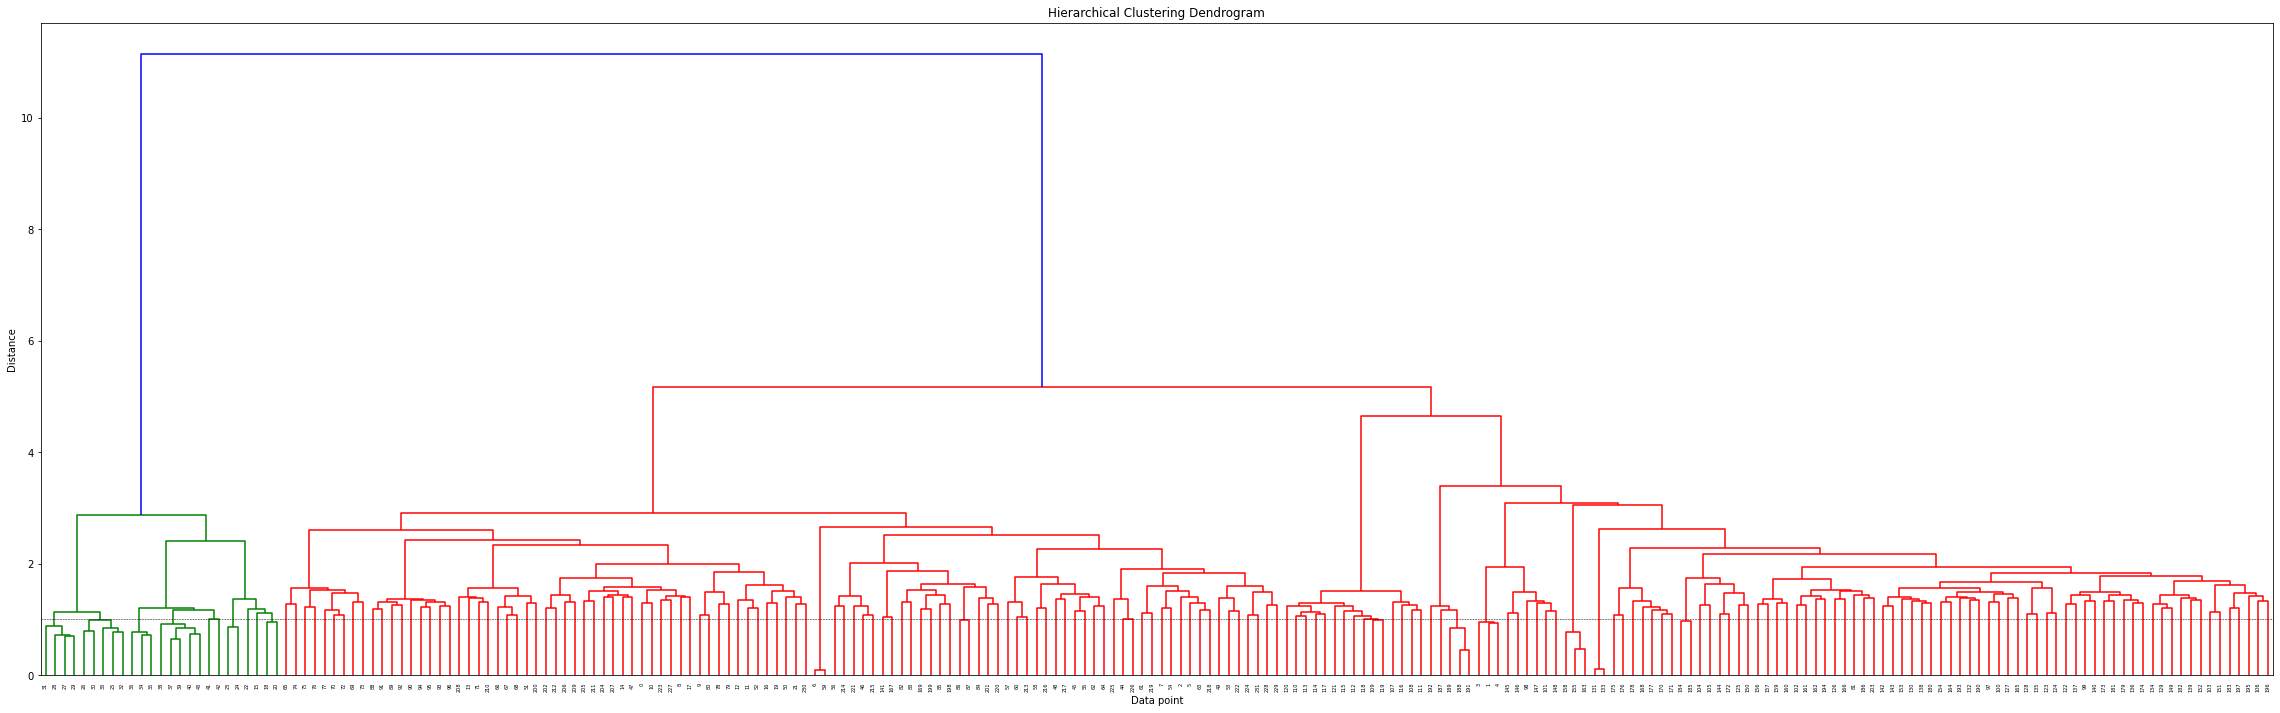

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

It actually grouped this into 3, not sure how accuracy that is, I haven't read each background story.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([background_df, cluster_labels], axis=1)

,Background information,no_contract,background_information_str,lower_case,no_punc,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,tokenized_Background information_join,ClusterLabel
0,On behalf of Ms. Amira I would like to ask for...,"[On, behalf, of, Ms., Amira, I, would, like, t...",On behalf of Ms. Amira I would like to ask for...,on behalf of ms. amira i would like to ask for...,on behalf of ms amira i would like to ask for ...,"[on, behalf, of, ms, amira, i, would, like, to...","[behalf, ms, amira, would, like, ask, cooperat...","[(behalf, NN), (ms, NN), (amira, NN), (would, ...","[(behalf, n), (ms, n), (amira, n), (would, n),...","[behalf, m, amira, would, like, ask, cooperati...",behalf m amira would like ask cooperation trac...,48
1,The following information has been supplied by...,"[The, following, information, has, been, suppl...",The following information has been supplied by...,the following information has been supplied by...,the following information has been supplied by...,"[the, following, information, has, been, suppl...","[following, information, supplied, youth, welf...","[(following, VBG), (information, NN), (supplie...","[(following, v), (information, n), (supplied, ...","[follow, information, supply, youth, welfare, ...",follow information supply youth welfare office...,130
2,I hope you all are well and sane in these chal...,"[I, hope, you, all, are, well, and, sane, in, ...",I hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,i hope you all are well and sane in these chal...,"[i, hope, you, all, are, well, and, sane, in, ...","[hope, well, sane, challenging, times, kindly,...","[(hope, NN), (well, RB), (sane, RB), (challeng...","[(hope, n), (well, r), (sane, r), (challenging...","[hope, well, sane, challenge, time, kindly, as...",hope well sane challenge time kindly ask suppo...,105
3,"The child protection office in Beirut, Lebanon...","[The, child, protection, office, in, Beirut,, ...","The child protection office in Beirut, Lebanon...","the child protection office in beirut, lebanon...",the child protection office in beirut lebanon ...,"[the, child, protection, office, in, beirut, l...","[child, protection, office, beirut, lebanon, r...","[(child, NN), (protection, NN), (office, NN), ...","[(child, n), (protection, n), (office, n), (be...","[child, protection, office, beirut, lebanon, r...",child protection office beirut lebanon request...,130
4,I am writing from Children and Families Across...,"[I, am, writing, from, Children, and, Families...",I am writing from Children and Families Across...,i am writing from children and families across...,i am writing from children and families across...,"[i, am, writing, from, children, and, families...","[writing, children, families, across, borders,...","[(writing, VBG), (children, NNS), (families, N...","[(writing, v), (children, n), (families, n), (...","[write, child, family, across, border, uk, req...",write child family across border uk request as...,130
...,...,...,...,...,...,...,...,...,...,...,...,...
227,Hadiya was 8 years old when her father interve...,"[Hadiya, was, 8, years, old, when, her, father...",Hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,hadiya was 8 years old when her father interve...,"[hadiya, was, 8, years, old, when, her, father...","[hadiya, 8, years, old, father, intervened, sa...","[(hadiya, RB), (8, CD), (years, NNS), (old, JJ...","[(hadiya, r), (8, n), (years, n), (old, a), (f...","[hadiya, 8, year, old, father, intervene, save...",hadiya 8 year old father intervene save secret...,51
228,"Alexandru, 17 years old left Bulgaria for Unit...","[Alexandru,, 17, years, old, left, Bulgaria, f...","Alexandru, 17 years old left Bulgaria for Unit...","alexandru, 17 years old left bulgaria for unit...",alexandru 17 years old left bulgaria for unite...,"[alexandru, 17, years, old, left, bulgaria, fo...","[alexandru, 17, years, old

K-Means Clustering - Applying GloVe 

In [ ]:
#!pip install spacy
!python -m spacy download en_vectors_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


Click on "Runtime" on top -- "Restart Runtime" -- Then run the below cell - otherwise you will get an error

In [ ]:
import spacy
nlp = spacy.load('en_vectors_web_lg')
nlp

In [ ]:
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [ ]:

unique_words = list(set([word for sublist in [doc.split() for doc in background_df['Background information'][:100]] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
"claim,",-0.282436,0.424590,-0.151115,0.059738,-0.066775,0.114250,0.001265,-0.271995,-0.069830,2.440700,0.061989,-0.009715,0.183879,0.165630,-0.587690,-0.301455,0.007760,1.050590,-0.139270,-0.035710,0.199655,0.062840,0.105814,-0.055235,0.222805,0.135635,-0.073724,-0.416371,0.310157,-0.262600,0.200310,0.239700,0.024255,0.326940,0.284945,-0.218845,-0.286481,-0.082033,-0.001230,-0.144906,...,0.290955,0.117380,0.027722,0.438550,-0.010975,0.220376,0.219516,-0.187670,0.386631,-0.161683,0.066425,-0.055820,-0.091835,-0.052959,-0.029885,0.027920,-0.299715,0.255960,-0.089749,0.143390,0.246015,0.106645,0.366850,0.063515,-0.345886,0.157651,-0.337666,-0.108885,0.402290,-0.068509,-0.261900,0.106114,-0.297895,-0.182960,-0.062290,-0.155925,-0.247081,-0.024530,0.131480,0.017145
officer.,-0.139989,0.176345,-0.099783,-0.267119,0.092231,0.107681,-0.090780,-0.475995,-0.125190,2.755500,-0.396160,0.207980,0.317470,-0.281031,-0.357255,-0.232852,0.068747,0.865975,-0.033960,-0.145399,0.209865,-0.091278,-0.065108,-0.259034,0.081730,0.118438,-0.373190,-0.148414,0.193630,-0.273949,0.003351,-0.359390,-0.080246,0.187590,-0.070620,-0.179866,0.139316,0.107633,0.043755,-0.338071,...,-0.056275,0.387170,-0.117970,-0.323480,-0.243540,-0.111925,-0.236970,0.016265,0.256865,-0.166410,0.097835,0.211298,0.199714,0.074565,-0.192346,0.354890,0.161500,-0.096480,0.072190,-0.148535,0.209530,-0.012480,0.066858,-0.168053,-0.343525,-0.194562,0.075300,0.027560,0.355895,0.089495,0.115145,0.051646,-0.029980,-0.075499,-0.435335,0.117150,0.133870,0.295795,-0.178645,0.009403
international,-0.025305,0.316470,0.661020,0.324580,1.106200,-0.386970,0.194660,0.378290,-0.313510,2.702800,-0.899620,-0.100290,0.205260,-0.352030,0.421570,-0.413570,-0.123480,0.928300,0.061309,0.287720,0.016292,0.207350,-0.228600,0.232500,0.380430,-0.427880,-0.130800,-0.005548,0.425660,0.477640,0.381800,0.358440,0.411390,-0.183800,-0.152570,-0.324680,0.203220,-0.705430,0.300960,0.182240,...,0.056912,-0.028554,0.071123,0.365930,-0.306710,-0.707490,-0.061532,0.066512,0.441450,-0.371110,-0.597030,0.065603,0.467670,0.326490,0.644880,0.447510,0.077873,0.076262,0.382160,0.476620,-0.400170,-0.228560,0.539970,0.340370,0.110970,0.074876,-0.152590,0.076262,0.117540,0.121990,-0.056566,0.113580,0.290000,0.212730,0.303540,-0.153410,0.413110,-0.272650,-0.081709,0.552820
holding,0.109110,-0.383620,-0.214640,0.162580,0.246990,-0.295460,-0.309620,-0.086417,-0.000203,2.511900,-0.018651,0.219460,0.202500,-0.452580,-0.080637,-0.163430,-0.205130,1.028300,-0.566310,0.232220,-0.010822,0.155260,-0.043869,-0.012842,0.261730,0.008573,-0.129910,-0.335260,-0.042056,-0.151340,-0.377660,-0.153460,-0.023653,-0.109850,0.193660,0.060713,0.205900,0.183310,0.208720,-0.492760,...,0.129420,0.603740,-0.080587,0.419860,0.359930,0.471100,-0.112960,-0.413170,-0.012465,-0.554410,0.200170,0.001199,-0.074749,-0.032905,0.175610,0.422260,0.086499,-0.152900,0.031904,-0.493350,-0.101500,0.146460,-0.173770,0.086177,0.306390,-0.061412,-0.027184,-0.023085,0.316570,0.182280,-0.008394,0.305860,0.183190,-0.667680,-0.396010,0.252540,-0.050339,0.159500,0.145000,0.050570
hospitalization,-0.321960,0.266910,-0.229110,0.022407,-0.664870,-1.026700,0.055344,-0.607650,0.515210,1.650600,-0.046258,0.074399,0.262330,0.693320,0.155080,-0.193200,-0.016209,0.298830,0.030106,-0.052069,-0.347030,-0.103900,-0.932880,-0.017438,-0.060582,0.429050,0.267090,-0.186720,0.582410,0.223160,0.356210,-0.148000,0.390960,-0.175270,-0.444610,0.333760,-0.406910,-0.256750,0.032546,0.556480,...,-0.904840,0.338590,-0.118550,-0.064627,-0.034364,0.387970,-0.082252,0.454090,-0.629260,-0.141050,0.345180,-0.231900,0.297640,-0.242630,-0.213810,0.306780,0.023983,0.155330,-0.475460,0.430330,-0.091023,0.106410,0.184590,-0.068448,0.348490,

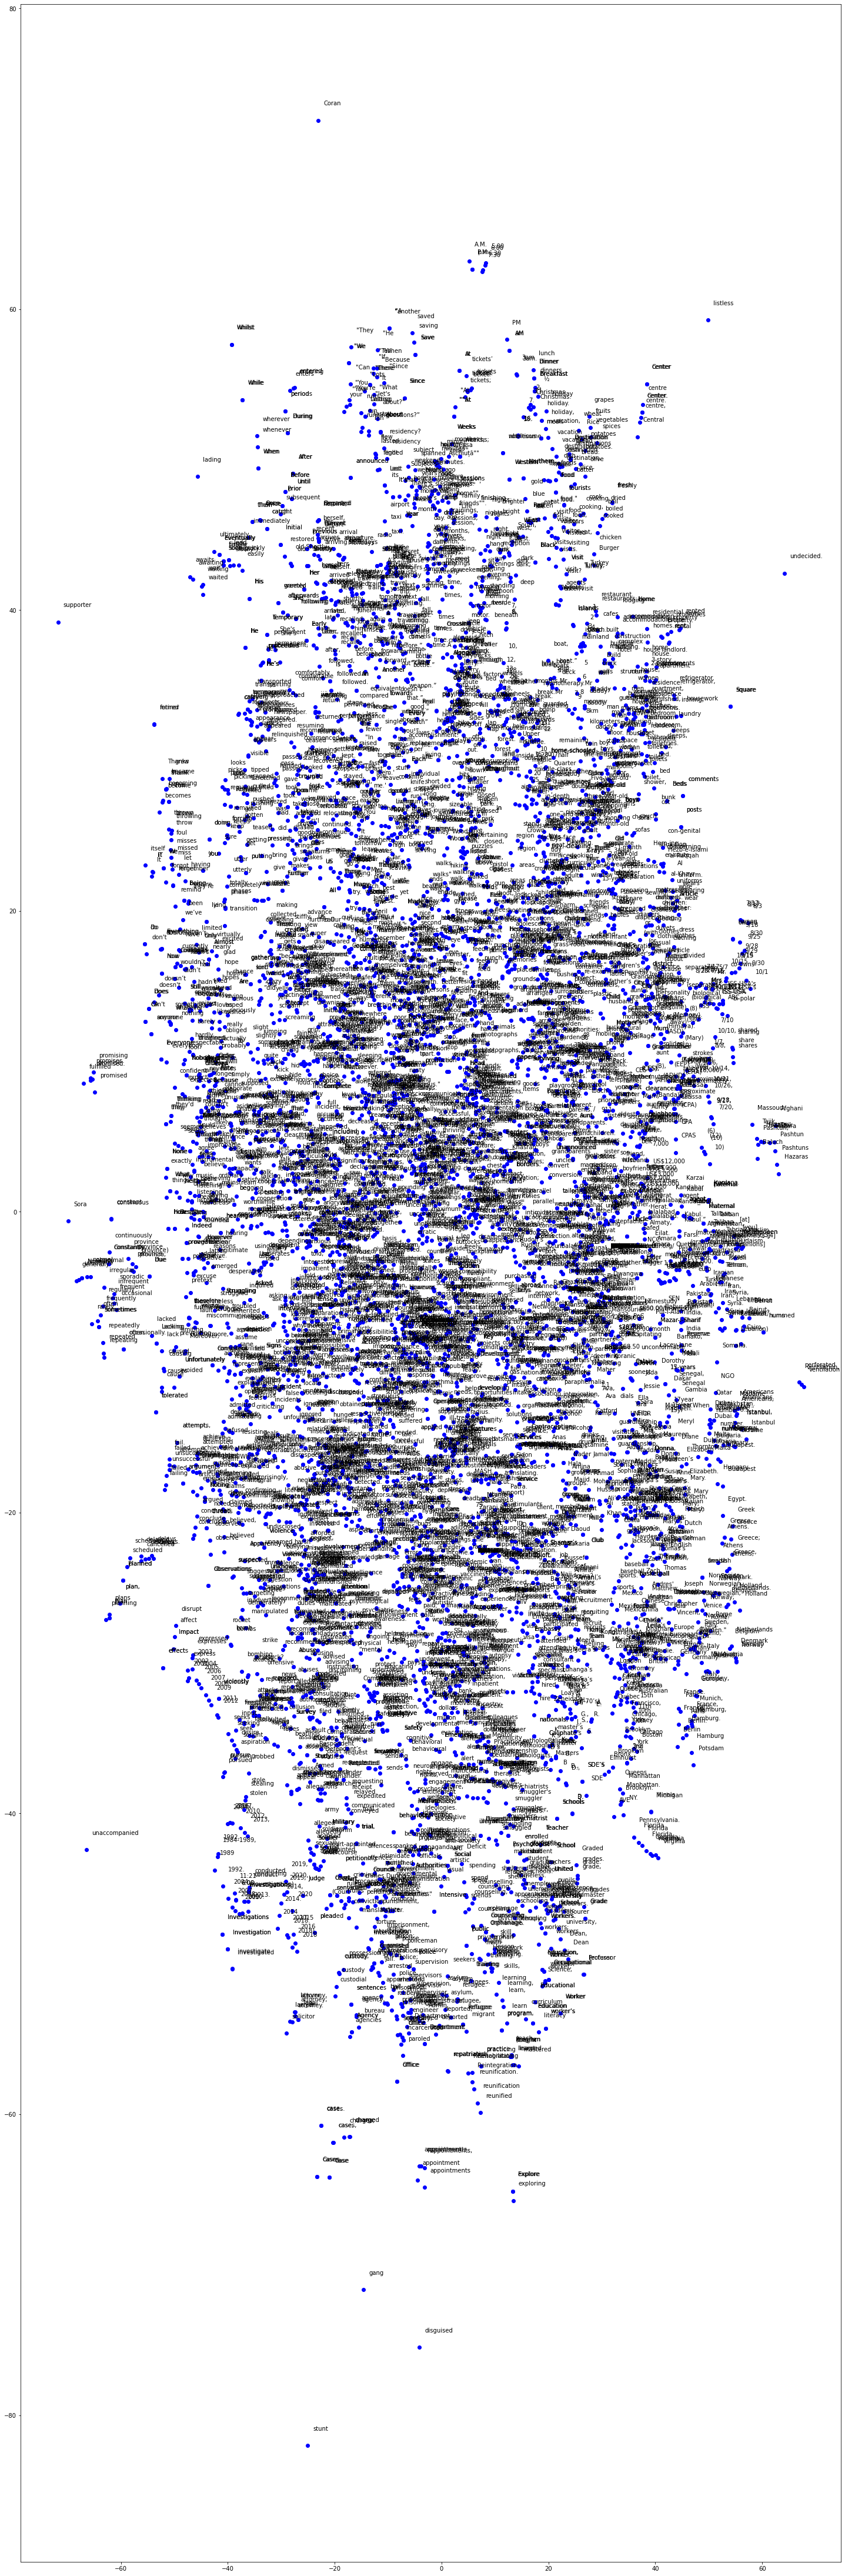

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(25, 80))
plt.scatter(T[:, 0], T[:, 1], c='blue', edgecolors='b')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

**Document Clustering** - KMeans

In [ ]:
# Number of cluster is user defined
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in background_df['Background information'][:100]])

km = KMeans(n_clusters=10, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([background_df['Background information'][:100], cluster_labels], axis=1)

,Background information,ClusterLabel
0,On behalf of Ms. Amira I would like to ask for...,4
1,The following information has been supplied by...,4
2,I hope you all are well and sane in these chal...,4
3,"The child protection office in Beirut, Lebanon...",4
4,I am writing from Children and Families Across...,4
...,...,...
95,Lacey-Jane had been severely neglected by her ...,6
96,Thomas’s short life had been one of abuse and ...,6
97,Between the ages of three to 15 years old SDE ...,1
98,"In June 2012, Mr K was viciously attacked by h...",1


In [ ]:
nlp2 = spacy.load('en_core_web_sm')

In [ ]:
from spacy import displacy

#for sentence in background_df['Background information']:
#  sentence_doc = nlp2(sentence)
  
#  displacy.render(sentence_doc, style='dep', jupyter=True)
#  print('Sentence is: ', sentence_doc)

In [ ]:
for sentence in background_df['Background information']:
  sentence_doc2 = nlp2(sentence)
  
[(x.text,x.label_) for x in sentence_doc2.ents]

Here we can see that 'Cambridge University Hospitals NHS Foundation Trust' is an organization and 'December 2014' as date.

In [ ]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# Someone already worked on NER, so check above site for more information
#displacy.render(sentence_doc2, style='ent')